<a href="https://colab.research.google.com/github/Manish-2708/pyt_man/blob/main/crudeoilproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#import dataset
df = pd.read_excel("/content/Crude Oil Prices Daily ....xlsx")
df.head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [ ]:
df.tail()

,Date,Closing Value
9535,2023-09-12,93.58
9536,2023-09-13,93.04
9537,2023-09-14,95.20
9538,2023-09-15,95.55
9539,2023-09-18,95.95


In [ ]:
#Data exploration
df.isnull().sum()

Date             0
Closing Value    6
dtype: int64

In [ ]:
df.shape

(9540, 2)

In [ ]:
df.nunique()

Date             9540
Closing Value    5405
dtype: int64

In [ ]:
df.dtypes

Date             datetime64[ns]
Closing Value           float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9540 non-null   datetime64[ns]
 1   Closing Value  9534 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 149.2 KB


In [ ]:
#data cleaning
new_df = df.dropna()

In [ ]:
new_df

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
9535,2023-09-12,93.58
9536,2023-09-13,93.04
9537,2023-09-14,95.20
9538,2023-09-15,95.55


In [ ]:
new_df.set_index('Date',inplace=True)

In [ ]:
new_df.head(10)

,Closing Value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87
1986-01-09,26.03
1986-01-10,25.65
1986-01-13,25.08
1986-01-14,24.97


In [ ]:
new_df.shape

(9534, 1)

In [ ]:
new_df.describe()

,Closing Value
count,9534.000000
mean,47.329012
std,30.156943
min,9.120000
25%,20.080000
50%,37.760000
75%,70.900000
max,145.310000


Data Visualization

In [ ]:
#Separating Month and Year into Separate Column for Visualization for meaningful insight of the data
df["Date"]  = pd.to_datetime(df.Date, format="%b-%y")
df["month"] = df.Date.dt.strftime("%b") # month extraction
df["year"]  = df.Date.dt.strftime("%Y") # year extraction
df.head(10)

,Date,Closing Value,month,year
0,1986-01-02,25.56,Jan,1986
1,1986-01-03,26.00,Jan,1986
2,1986-01-06,26.53,Jan,1986
3,1986-01-07,25.85,Jan,1986
4,1986-01-08,25.87,Jan,1986
5,1986-01-09,26.03,Jan,1986
6,1986-01-10,25.65,Jan,1986
7,1986-01-13,25.08,Jan,1986
8,1986-01-14,24.97,Jan,1986
9,1986-01-15,25.18,Jan,1986


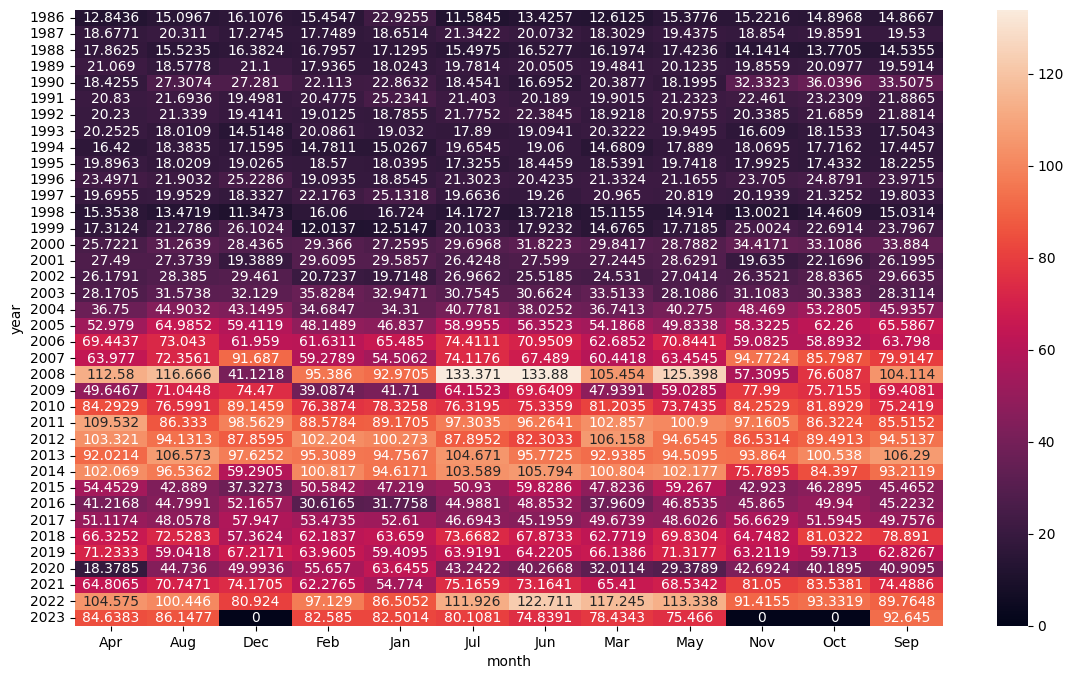

In [ ]:
plt.figure(figsize=(14,8))
heatmap_y_month = pd.pivot_table(data=df,values="Closing Value",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
plt.show()

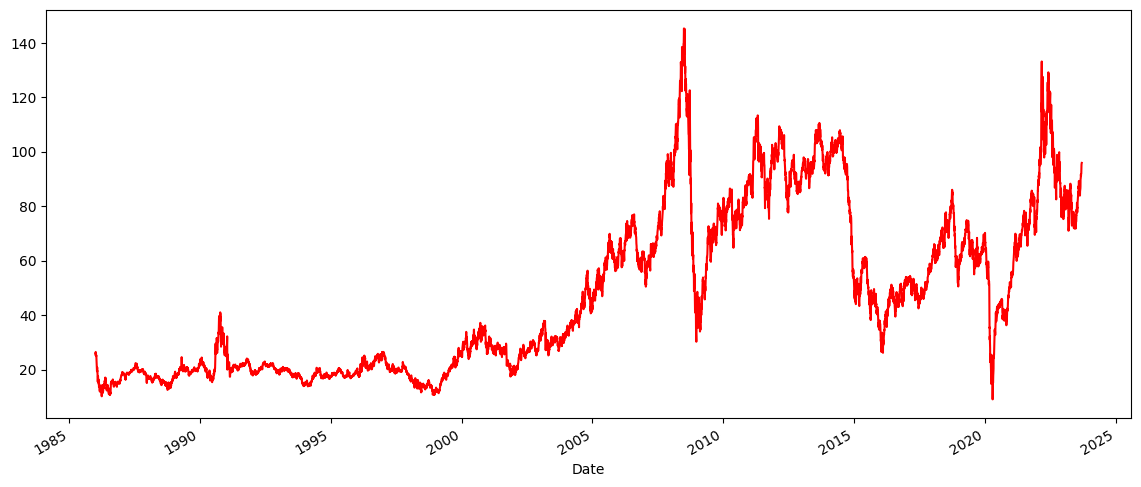

In [ ]:
#line plot
new_df['Closing Value'].plot(figsize=(14,6),color='red')
plt.show()

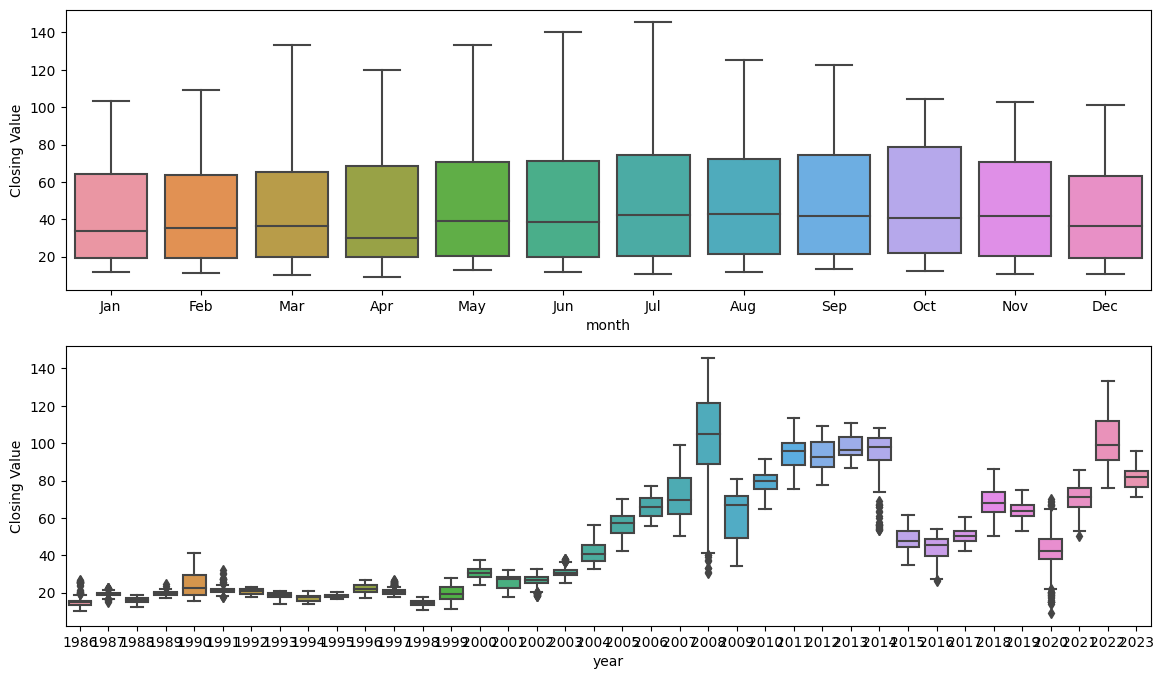

In [ ]:
#Box Plot of Each Year by Monthly Intervals
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x="month", y="Closing Value", data=df)
plt.subplot(212)
sns.boxplot(x="year", y="Closing Value", data=df)
plt.show()

In [ ]:
test_result=adfuller(new_df['Closing Value'])

In [ ]:
#H0:It is non stationary
#H1:It is stationary
def  adfuller_test(closingValue):
     result=adfuller(closingValue)
     labels = ['ADF test statistic','p-value','#lags used','Nos of ovservation used']
     for value,label in zip(result,labels):
        print(label+' : '+str(value))
     if result [1] <=0.05:
        print("strong evidence against null hypothesis(H0),reject the null hypothesis,Data has no unit root and is stationary")
     else:
        print("weak evidence aginst null hypothesis,time series has unit root,indicating it is non stationary")


In [ ]:
adfuller_test(new_df['Closing Value'])

ADF test statistic : -2.074770427144473
p-value : 0.25477978718023686
#lags used : 33
Nos of ovservation used : 9500
weak evidence aginst null hypothesis,time series has unit root,indicating it is non stationary
